<a href="https://colab.research.google.com/github/alfonso-uacj/ColabFiles/blob/main/PracticaRegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Lopez Rodriguez Alfonso
*   Matrícula:al256111

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

- Son cuatro columnas (variables) y como lo indica las instrucciones arriba la variable dependiente es sales. CAbe recalcar que todas tienes 200 registros lo que indica que no hay valores vacios o nulos. Hay una inversion media en publicidad de TV: 147.042, Radio: 23.26 y periodico :30.55, lo que indica que el gasto es mayor e publicidad es de la television.

In [5]:
import pandas as pd

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

print("\n*************************************************")

# Descripción estadística de las variables
print("\nDescripción estadística del conjunto de datos:")
print(df.describe(include='all'))


Primeras filas del DataFrame:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

*************************************************

Descripción estadística del conjunto de datos:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

-Con respecto a la TV se ve una relacion lineal fuerte ya que esta pegada a la linea, significa entre mas inversion a TV mayores ventas. El radio tambien es ascente aunque mas disperso a comparacion con la TV y el periodico es el mas debil de los tres.

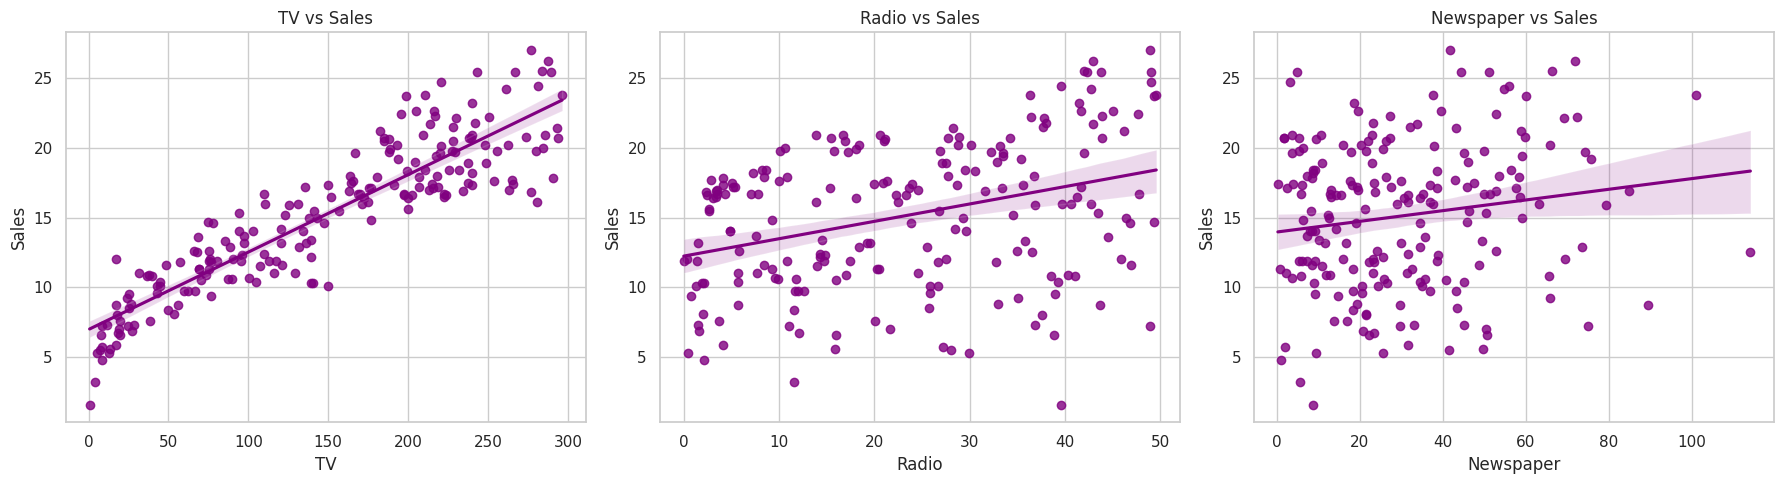

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')


# Crear una figura con 3 subplots
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=df, color='purple')
plt.title('TV vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=df, color='purple')
plt.title('Radio vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=df, color='purple')
plt.title('Newspaper vs Sales')

# Grafico
plt.tight_layout()
plt.show()


### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

-Seguimos comprobando lo anterior , la relacion mas fuerte de sales es en TV con 0.90 (muy cercano a 1). Entre variables como TV, Radio y periodico no hay relaciones fuertes.

Matriz de correlacion:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


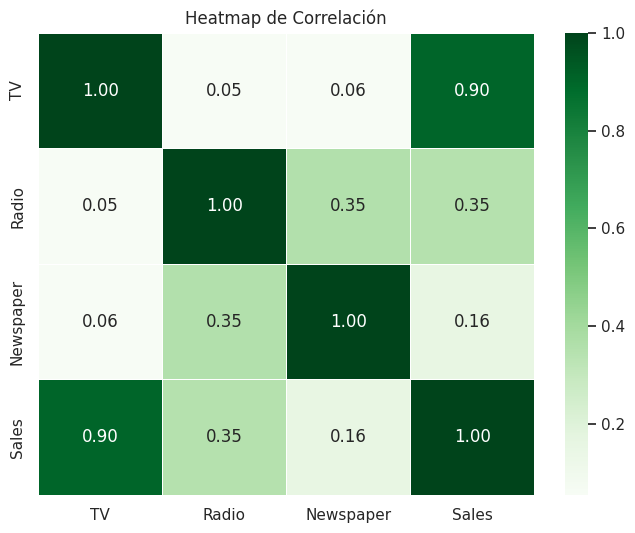

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# matriz de corr
correlacion = df.corr()

# Mostrar la matriz
print("Matriz de correlacion:")
print(correlacion)

# Visualizar con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()


## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?

Ninguna variable tiene esas caracteristicas, todos son alrededor de 1.

- ¿Qué implicaciones tiene esto para el modelo?

Se pueden usar todas las variables en el modelo de regresion multiple sin riesgo de que causen ruido o cause desestabilidad.

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


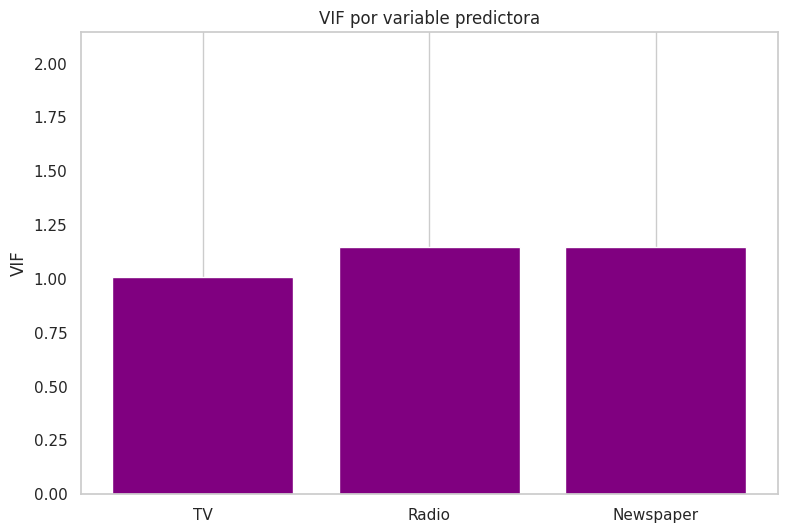

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor   #se usara statsmodels
from statsmodels.tools.tools import add_constant

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Seleccionar las variables independientes
X = df[['TV', 'Radio', 'Newspaper']]

# Agregar constante (intercepto)
X_const = add_constant(X)

# Calcular VIF
vif_dato = pd.DataFrame()
vif_dato['Variable'] = X_const.columns
vif_dato['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar tabla de VIF
print(vif_dato)

# Graficar
plt.figure(figsize=(9, 6))
plt.bar(vif_dato['Variable'][1:], vif_data['VIF'][1:], color='purple')
plt.title('VIF por variable predictora')
plt.ylabel('VIF')
plt.ylim(0, max(vif_dato['VIF'][1:]) + 1)
plt.grid(axis='y')
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

-Las ventas estarian segun el intercepto en 4.6 unidades si no se invertiera en publicidad. Asi sucesivamente en el caso de las variables: por cada unidad que se invierta se tendra una venta de 0.054 en el caso de la TV; en el caso de radio seria 0.10 y por ultimo en el periodico seria de 0.00033.

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables independientes (X) y dependiente (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Crear y entrenar el modelo con sklearn
modelo = LinearRegression()
modelo.fit(X, y)

# Mostrar resultado
print("Intercepto :")
print(modelo.intercept_)
print("\nCoeficientes:")
for var, coef in zip(X.columns, modelo.coef_):
    print(f"{var}: {coef}")

Intercepto :
4.625124078808653

Coeficientes:
TV: 0.05444578033757095
Radio: 0.10700122823870292
Newspaper: 0.00033565792233056224


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

-Casi se forma una campana en la grafica, pero podemos ver algunos valores fuera outliers. Es asimetrica porque hay valores que se cargan hacia la izquierda. Podemos decir que es asimetrica y es parcialmente normal.

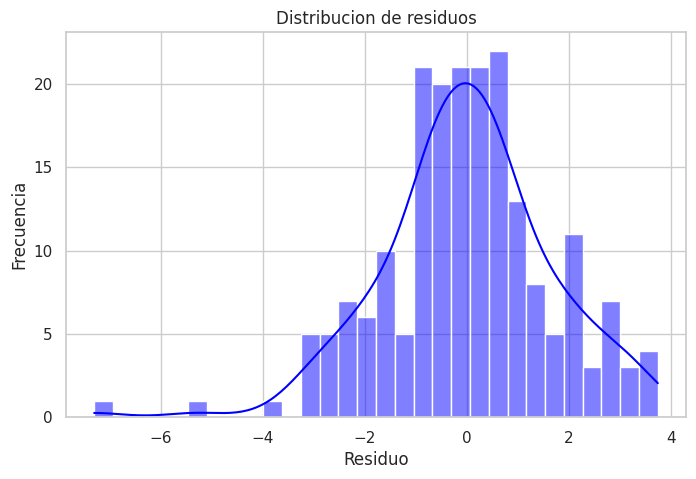

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones
y_predic = modelo.predict(X)

# Calcular residuos
residuos = y - y_predic

# Graficar histograma con KDE
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribucion de residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

Se busca la varianza constante de los valores en la homocedasticidad. Los valores mostrados estan dispersos sin un patron fijo alrededor de la linea cero, lo cual indica que cumpliria con la homocedasticidad, se puede confiar mas en los resultados del modelo.

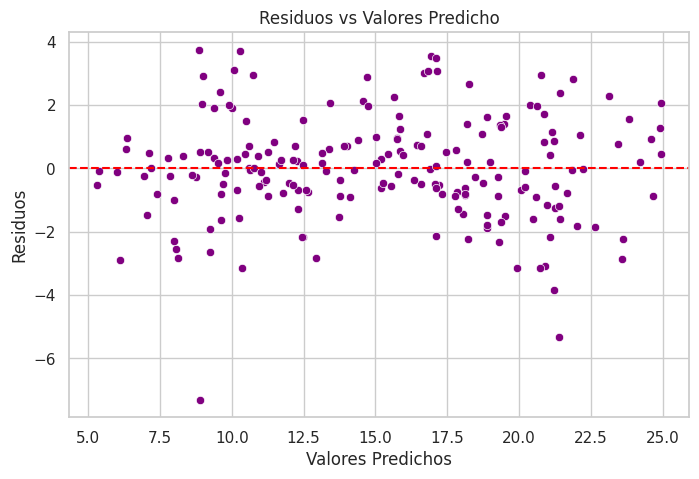

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# residuos
residuos = y - y_pred

# Gráfico de residuos vs valores predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores Predicho")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

Se sigue analizando los residuos, en este caso es muy pegado a la linea, lo cual indica sobre el punto a) que efectivamente sigue una distribucion normal. De igual forma existen desviaciones en los extremos pero no se considerarian pesadas si no ligeras en forma de outliers.

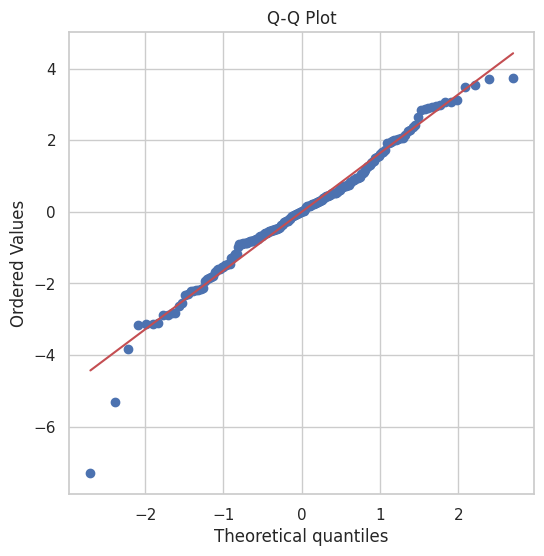

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# Calcular residuos
residuos = y - y_pred

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(True)
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

El MSE es bajo 2.706 se puede decir que el modelo se equivoca muy poco, es el valor que varia segun las ventas y la prediccion por ejemplo. El rMSE es 1.645 , si es menor a dos por lo regular indica que hay un margen de error bajo en la prediccion. El R² es  0.903, lo que indica que la variablidad de los resultados es explicado efectivamente por las variables involucradas (TV, Radio y periodico) en un 90 % aproximadamente.


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# Calcular lo requerido
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Mostrar resultados
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

MSE: 2.706
RMSE: 1.645
R²: 0.903


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

Los puntos estan muy cercanos a la linea roja lo que indica una dispersion muy baja, lo cual puede decirse que la prediccion h sido buena, todo se alinea a excepcion de algunos valores fuera en las orillas, pero en general se muestra que los errores han sido pocos y consistentes sin sobresaltos en la grafica.

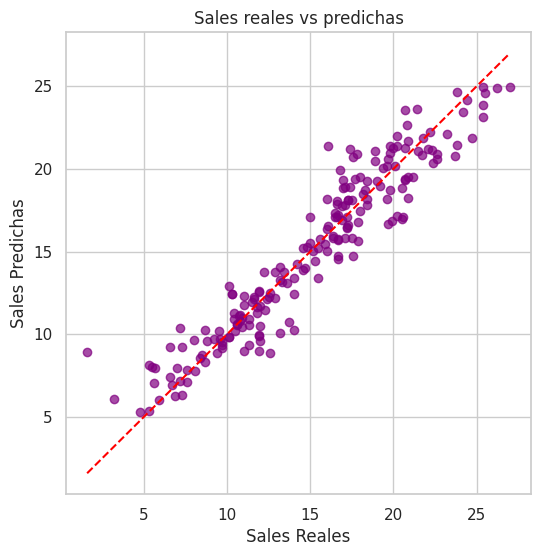

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables
X = df[['TV', 'Radio', 'Newspaper']]
y_true = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y_true)
y_pred = modelo.predict(X)

# Gráfico
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, color='purple', alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
plt.xlabel("Sales Reales")
plt.ylabel("Sales Predichas")
plt.title("Sales reales vs predichas")
plt.grid(True)
plt.show()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 Las variables TV y Radio.

 - ¿Cuál es la conclusión sobre esas variables?

 Que tiene un impacto sobre las ventas si se invierte en ellos.


In [34]:
import pandas as pd
import statsmodels.api as sm

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables independientes y dependiente
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# intercepto
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        23:45:08   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.


- En la parte Parte 3. Multicolinealidad de este ejercicio no se encontro tal caso de multicolinealidad entre las variables , todas ellas tenian un VIF menor a 5. La variable newspaper no es relevante para el modelo segun los resultados pero no afecta al modelo y puede aportar claridad en el resultado final para mostrar claramente las implicaciones de cada variabel y el gasto en publicidad.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

Se puede eliminar la variable newspapaer que no tiene mucha influencia en linealidad.

4.1 Entrenamiento del Modelo (Todas las Variables Independientes)
Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
Imprime el intercepto y los coeficientes del modelo.


In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables independientes (sin Newspaper)
X = df[['TV', 'Radio']]
y = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Imprimir resultados
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f"{nombre}: {coef}")


Intercepto: 4.630879464097768
Coeficientes:
TV: 0.05444896073124318
Radio: 0.10717457133676095


4.2 Calcula los residuos: residuos = y - y_pred.

Grafica un histograma con KDE de los residuos.

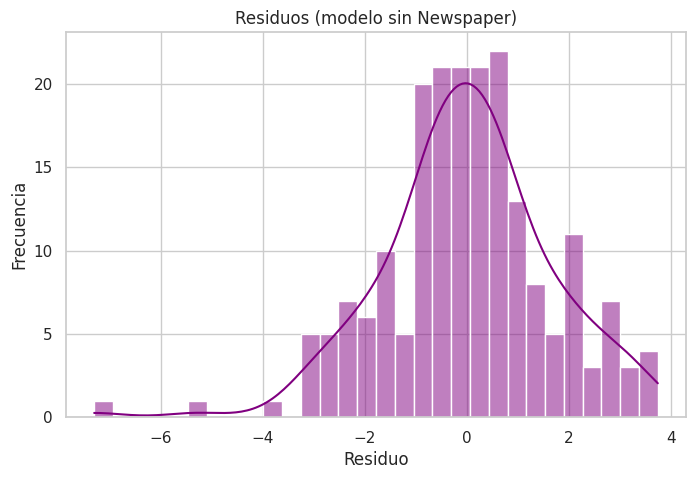

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Seleccionar solo TV y Radio como predictores
X = df[['TV', 'Radio']]
y = df['Sales']

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# modelo predictivo
y_pred = modelo.predict(X)

# Calcular residuos
residuos = y - y_pred

# Grafica
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='purple', bins=30)
plt.title("Residuos (modelo sin Newspaper)")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

4.3. Homocedasticidad
Grafica los residuos contra los valores predichos.

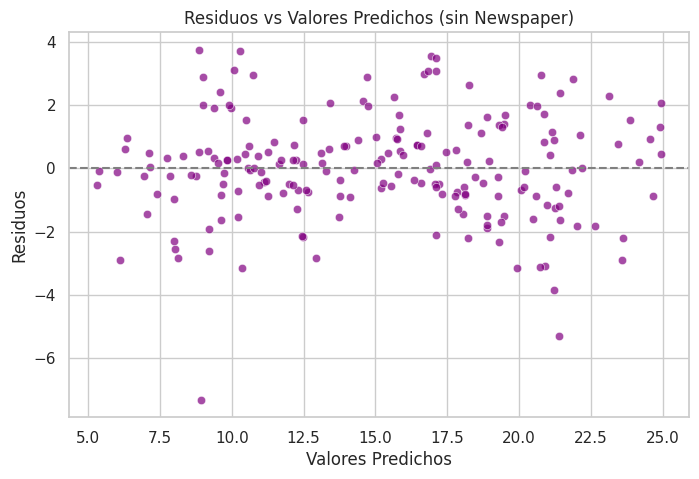

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')


# Seleccionar solo TV y Radio
X = df[['TV', 'Radio']]
y = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# Calcular residuos
residuos = y - y_pred

# Graficar residuos vs. valores predichos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos, color='purple', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuos vs Valores Predichos (sin Newspaper)")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

4.4 Q-Q Plot
Graficar el Q-Q Plot

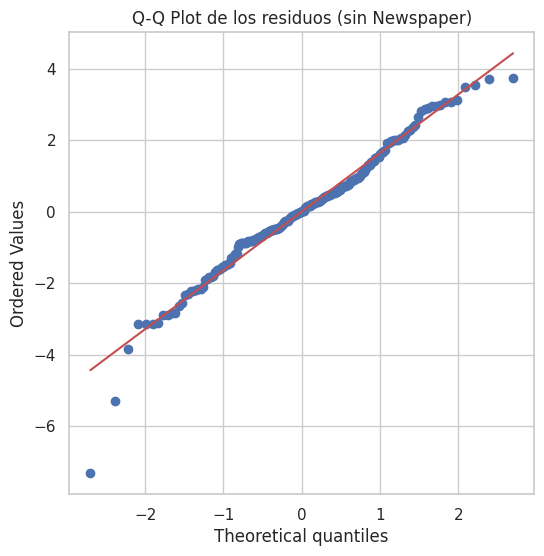

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables (sin Newspaper)
X = df[['TV', 'Radio']]
y = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# Calcular residuos
residuos = y - y_pred

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos (sin Newspaper)")
plt.grid(True)
plt.show()

4.5. Evaluación del Modelo
Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)



In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables (sin Newspaper)
X = df[['TV', 'Radio']]
y = df['Sales']

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# Calcular
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Imprimir
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.2f}")

MSE: 2.706
RMSE: 1.645
R²: 0.90


4.6. Visualización de Predicciones
Crea un gráfico comparando Sales reales vs Sales predichas.

Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.

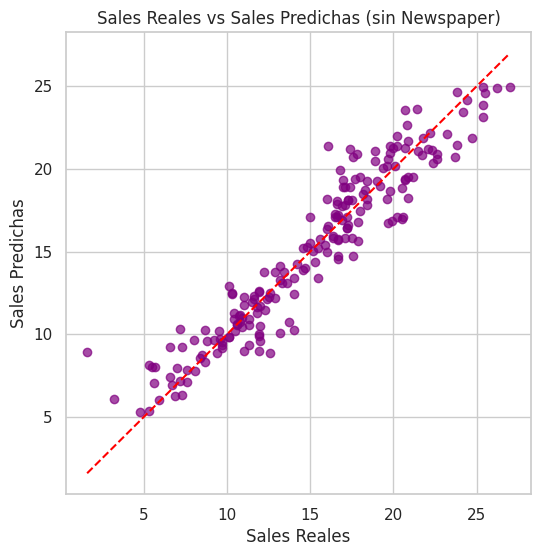

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables independientes (solo TV y Radio)
X = df[['TV', 'Radio']]
y_true = df['Sales']

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y_true)

# Predicciones
y_pred = modelo.predict(X)

# predicción vs realidad
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, color='purple', alpha=0.7)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
plt.xlabel("Sales Reales")
plt.ylabel("Sales Predichas")
plt.title("Sales Reales vs Sales Predichas (sin Newspaper)")
plt.grid(True)
plt.show()

4.7 Verificar el impacto de los atributos en el modelo
Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.

In [46]:
import pandas as pd
import statsmodels.api as sm


# archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')

# Variables independientes (solo TV y Radio)
X = df[['TV', 'Radio']]
y = df['Sales']

# Agregar constante (intercepto)
X = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          2.39e-100
Time:                        00:07:45   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

- Podriamos decir que el tercero donde se elimo la variable que no aporta mucho (newspaper). Se puede usar este modelo de forma mas general para predecir ciertos valores, aunque en este momento sigue siendo la mejor opcion la TV para invertir en publicidad , pero en dado caso se podria por ejemplo balancear con el costo beneficio (tal vez sea mas caro el tiempo de television, aunque eso no esta indicado en el dataset) y tomar desiciones conrespecto a ello. Al quitar la variable newspaper se puede ver que los datos tienden mas al normalizacion auqneu sigue habiendo cierto outliers, pero por ejemplo en el Q-Q Plot vemos una tendencia mas lienal en los resultados, aunque como se ha dicho como newspaper tieen un valor muy bajo no es tan notorio.